#                           ADAM OPTIMIZER FROM SCRATCH 
____________________________________________________________

## Steps involved in building a Neural Network in Numpy

 1. loading the data (input and output)
 2. Architecture of the model (input layer, hidden layer, output layer)
 3. initializing the weights for all the layers
 4. implementing forward propogation
 5. implementing backward propogation
 6. train model for no. of epochs

# 1. Loading the dataset (input and output)

In [1]:
# importing all the required libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inLine
import warnings
warnings.filterwarnings("ignore")

In [2]:
# creating the input array
X=np.array([[1,0,1,1], [1,0,1,1], [0,1,0,1]])
print("\n INPUT: ")
print(X)
# checking the shape of the input
print("\n shape of the input is: ", X.shape)


 INPUT: 
[[1 0 1 1]
 [1 0 1 1]
 [0 1 0 1]]

 shape of the input is:  (3, 4)


As we can see that we have 3 observations and 4 features so to do matrix multiplication we need to keep features first and observation next. so to obtain this results we take transpose of this matrix.

In [3]:
#converting it to matrix form
X=X.T
print("\n input in matrix form is: ")
print(X)
# checking the shape of the input
print("\n shape of the input is: ", X.shape)


 input in matrix form is: 
[[1 1 0]
 [0 0 1]
 [1 1 0]
 [1 1 1]]

 shape of the input is:  (4, 3)


As  we can see we have 4 features first and than observation so multiplication is possible

In [4]:
Y=np.array([[1], [1], [0]])
print("\n Actual output: ")
print(Y)
#converting it to matrix form
Y=Y.T
print("\n Actual output in matrix form is: ")
print(Y)
# checking the shape of the input
print("\n shape of the output is: ", Y.shape)


 Actual output: 
[[1]
 [1]
 [0]]

 Actual output in matrix form is: 
[[1 1 0]]

 shape of the output is:  (1, 3)


# 2. Architecture of the model(input layer, hidden layer, output neuroons)

In [5]:
inputlayer_neurons = X.shape[0] # number of features in the data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_layer = 1 # number of neurons at output layer

# 3. initializing the weights for all the layers

Note: for simplicity i am considering that the bias for all the layers to be 0

In [6]:
# initializing the weights
# shape of W_ih should be number of neurons at the input layer x number of neurons at the hidden layer

w_ih=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))

# shape of W_ho should be number of neurons at the hidden layer x number of neurons at the output layer
w_ho=np.random.uniform(size=(hiddenlayer_neurons,output_layer))

In [7]:
# checking shape of weight matrix
w_ih.shape , w_ho.shape

((4, 3), (3, 1))

# 4. implementing forward propogation

In [8]:
# defining the sigmoid function as activation function

def sigmoid (x):
    return 1/(1 + np.exp(-x))

In [9]:
# hidden layer activations

hidden_layer_input=np.dot(w_ih.T,X) #calculating z1 
hiddenlayer_activations = sigmoid(hidden_layer_input)

In [10]:
# calculating the output
output_layer_input=np.dot(w_ho.T,hiddenlayer_activations) #calculating z2 
output = sigmoid(output_layer_input)

In [11]:
output


array([[0.78991863, 0.78991863, 0.75918151]])

# 4. implementing backward propogation

In [12]:
# calculating error

error = np.square(Y-output)/2
error

array([[0.02206709, 0.02206709, 0.28817828]])

**AS PER THEORY(MATHS)**

1. WE FIRST CALCULATE RATE OF CHANGE OF ERROR W.R.T OUTPUT
2. RATE OF CHANGE OF OUTPUT W.R.T z2
3. Rate of change of z2 w.r.t weight between hidden and output layers

In [13]:
#calculating rate of change of error w.r.t output

error_wrt_OUTPUT= -(Y-output)
error_wrt_OUTPUT

array([[-0.21008137, -0.21008137,  0.75918151]])

In [14]:
#calculating rate of change of output w.r.t z2
output_wrt_z2 = np.multiply(output,(1-output))
output_wrt_z2

array([[0.16594719, 0.16594719, 0.18282494]])

In [15]:
#calculating rate of change of z2 w.r.t weights between hidden and output layer

z2_wrt_who = hiddenlayer_activations

z2_wrt_who 

array([[0.68014837, 0.68014837, 0.64306891],
       [0.89233816, 0.89233816, 0.87021277],
       [0.84741323, 0.84741323, 0.59270324]])

In [16]:
error_wrt_OUTPUT.shape, output_wrt_z2.shape, z2_wrt_who.shape

((1, 3), (1, 3), (3, 3))

In [17]:
w_ho.shape

(3, 1)

In [18]:
error_wrt_who = np.dot(z2_wrt_who ,(error_wrt_OUTPUT * output_wrt_z2).T)

In [19]:
error_wrt_who

array([[0.04183301],
       [0.05856508],
       [0.02317988]])

### Now lets calculate with respect to input and hidden layer 

1. rate of change of error with respect to output
2. rate of change of output w.r.t z2
3. rate of change of z2 w.r.t hidden layer activations
4. rate of change of h1 w.r.t to z1
5. rate of change of z1 W.R.T weight between input and hidden layer

In [20]:
# rate of change of error w.r.t output
error_wrt_OUTPUT= -(Y-output)

In [21]:
#calculating rate of change of output w.r.t z2
output_wrt_z2 = np.multiply(output,(1-output))

In [22]:
#rate of change of z2 w.r.t hidden layer activations
z2_wrt_h1=w_ho

In [23]:
#rate of change of h1 w.r.t to z1
h1_wrt_z1= np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))


In [24]:
#rate of change of z1 W.R.T weight between input and hidden layer
z1_wrt_wih = X

In [25]:
error_wrt_OUTPUT.shape, output_wrt_z2.shape, z2_wrt_h1.shape, h1_wrt_z1.shape, z1_wrt_wih.shape

((1, 3), (1, 3), (3, 1), (3, 3), (4, 3))

In [26]:
w_ih.shape

(4, 3)

In [27]:
error_wrt_wih = np.dot(z1_wrt_wih,(h1_wrt_z1*np.dot(z2_wrt_h1,(output_wrt_z2*error_wrt_OUTPUT))).T) 
error_wrt_wih

array([[-0.00470556, -0.00462564, -0.00529014],
       [ 0.00988314,  0.0108251 ,  0.01966061],
       [-0.00470556, -0.00462564, -0.00529014],
       [ 0.00517758,  0.00619946,  0.01437047]])

In [28]:
error_wrt_wih.shape

(4, 3)

# updating the paramaters using gradient descent equations

In [29]:
# defining the learning rate
lr=0.1

In [30]:
# initial who and wih
w_ho

array([[0.31022162],
       [0.69054741],
       [0.5867698 ]])

In [31]:
w_ih

array([[0.01536111, 0.67055147, 0.89284165],
       [0.18178978, 0.92967821, 0.17079933],
       [0.33217327, 0.47113537, 0.61726099],
       [0.40691936, 0.97316314, 0.20435243]])

In [32]:
#updating the weights of output layers who
w_ho = w_ho - lr * error_wrt_who
w_ho

array([[0.30603832],
       [0.6846909 ],
       [0.58445181]])

In [33]:
#updating the weights of output layers wih
w_ih = w_ih - lr * error_wrt_wih
w_ih

array([[0.01583166, 0.67101404, 0.89337066],
       [0.18080146, 0.9285957 , 0.16883327],
       [0.33264382, 0.47159793, 0.61779   ],
       [0.4064016 , 0.97254319, 0.20291538]])

# training the model for n epochs

In [34]:
#defining the model architecture

inputlayer_neurons = X.shape[0] # number of features in the data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_layer = 1 # number of neurons at output layer

# initializing the weights
# shape of W_ih should be number of neurons at the input layer x number of neurons at the hidden layer
w_ih=np.random.uniform(size=(inputlayer_neurons,hiddenlayer_neurons))
# shape of W_ho should be number of neurons at the hidden layer x number of neurons at the output layer
w_ho=np.random.uniform(size=(hiddenlayer_neurons,output_layer))

#defining parameters

lr = 0.1
epochs = 1000

In [35]:
#initial w_ih and w_ho
w_ih

array([[0.781048  , 0.76608568, 0.31214868],
       [0.93035925, 0.0622773 , 0.23436951],
       [0.37668029, 0.13120181, 0.19803562],
       [0.76398499, 0.4456235 , 0.12943125]])

In [36]:
w_ho

array([[0.67329625],
       [0.45260581],
       [0.96064307]])

# PARAMETERS FOR ADAM OPTIMIZER

In [37]:
beta1 = 0.9
beta2 = 0.9

v_ih = 0
v_ho = 0

u_ih= 0
u_ho = 0



In [38]:
error_epoch=[]
lr_hidden = []
lr_output = []
for i in range (epochs):
    #forward propogation part

    #hidden layer accitivations
    hidden_layer_input=np.dot(w_ih.T,X) 
    hiddenlayer_activations = sigmoid(hidden_layer_input)

    # calculating the output
    output_layer_input=np.dot(w_ho.T,hiddenlayer_activations)
    output = sigmoid(output_layer_input)

    #backward propogation

    #calculating error
    error = np.square(Y-output)/2
    error_wrt_OUTPUT= -(Y-output)
    output_wrt_z2 = np.multiply(output,(1-output))
    z2_wrt_who = hiddenlayer_activations

    #rate of change of error w.r.t weights between hidden layer and output layer
    error_wrt_who = np.dot(z2_wrt_who ,(error_wrt_OUTPUT * output_wrt_z2).T)

    #rate of change of error w.r.t weights between input layer and hidden layer
    error_wrt_wih = np.dot(z1_wrt_wih,(h1_wrt_z1*np.dot(z2_wrt_h1,(output_wrt_z2*error_wrt_OUTPUT))).T) 

    # weighted gradients
    v_ho = beta1 * v_ho + (1-beta1) *  error_wrt_who 
    w_ho = w_ho - lr * v_ho
    v_ih = beta1 * v_ih + (1-beta1) *  error_wrt_wih
    w_ih = w_ih - lr * v_ih
    # weighted squared gradients
    u_ho = beta2 * u_ho + (1-beta2)* np.square(error_wrt_who)
    u_ih = beta2 * u_ih + (1-beta2)* np.square(error_wrt_wih)

    # updating the learning rate
    new_lr_o = lr / np.sqrt(u_ho.sum())
    new_lr_h = lr / np.sqrt(u_ih.sum())

    #updating parameter for output layer who
    w_ho = w_ho - new_lr_o * error_wrt_who
    #updating parameter for input layer wih
    w_ih = w_ih - new_lr_h * error_wrt_wih

    # appending  the error of each epoch
    error_epoch.append(np.average(error))
    lr_hidden.append(np.average(new_lr_h))
    lr_output.append(np.average(new_lr_o))

In [39]:
w_ih

array([[  9.35674097,   9.19612675,   9.95320886],
       [-30.63064142, -34.50679448, -62.55018521],
       [  8.95237326,   8.56124289,   9.8390958 ],
       [-22.22132271, -25.69340721, -53.01406328]])

In [40]:
w_ho

array([[84.79575234],
       [18.43421915],
       [ 5.30781156]])

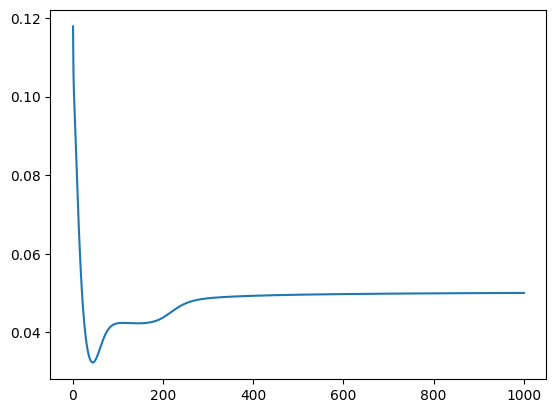

In [41]:
#visualize the error after each epoch
plt.plot(np.arange(1,epochs+1),np.array(error_epoch))

Text(0.5, 1.0, 'lr_output')

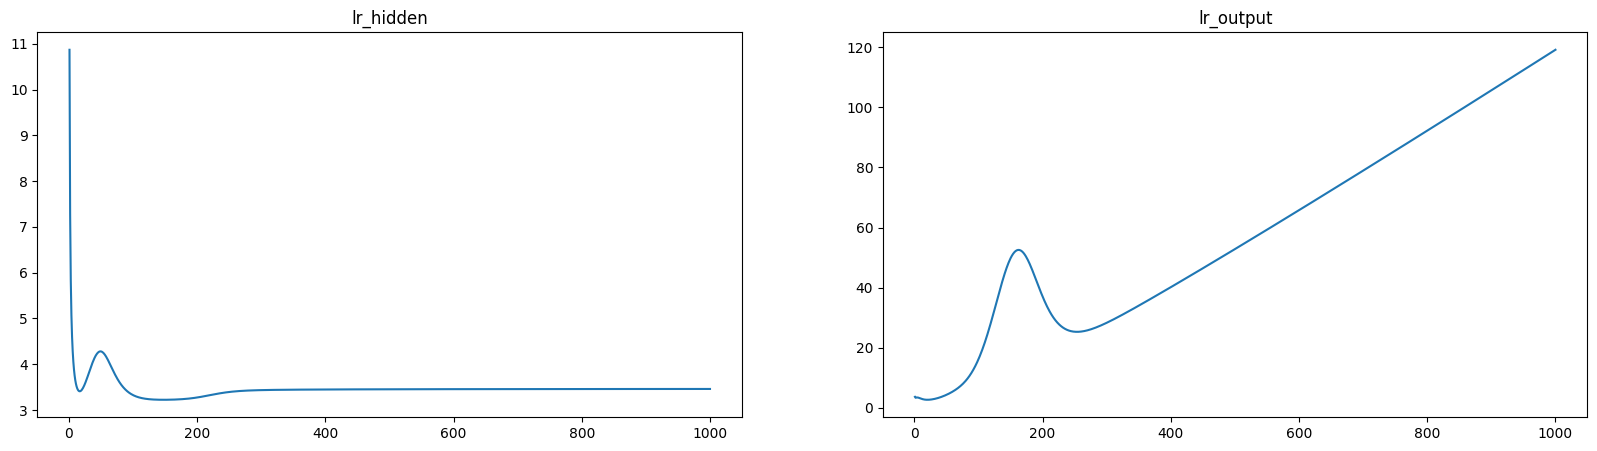

In [42]:
# learning rate after each epochs
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.plot(np.arange(1,epochs+1), np.array(lr_hidden))
plt.title("lr_hidden")

plt.subplot(1,2,2)
plt.plot(np.arange(1,epochs+1), np.array(lr_output))
plt.title("lr_output")

In [43]:
output

array([[0.84143962, 0.84143962, 0.5       ]])

In [44]:
Y

array([[1, 1, 0]])

In [45]:
error

array([[0.0125707, 0.0125707, 0.125    ]])